In [4]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import GPE_ensemble as GPE

#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion, 
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion

import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 8
#set_seed(seed)

In [5]:
x_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\xlabels_EP.txt',delim_whitespace=True,header=None)
inputOrig = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\X_EP.txt',index_col=None,delim_whitespace=True,header=None)
inputOrig.columns=x_labels
print(inputOrig)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pmzcwl\\Documents\\GitHub\\Calibration\\shared_simulations\\EP_healthy\\input\\xlabels_EP.txt'

In [6]:
y_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\ylabels.txt',delim_whitespace=True,header=None)
outputOrig = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\Y.txt',index_col=None,delim_whitespace=True,header=None)
outputOrig.columns=y_labels
print(outputOrig)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pmzcwl\\Documents\\GitHub\\Calibration\\shared_simulations\\EP_healthy\\output\\ylabels.txt'

In [904]:
# split original dataset in training, validation and testing sets
X=inputOrig
y=outputOrig
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1,
    random_state=seed
)

In [906]:
emulator = GPE.ensemble(X_train.iloc[:,0:6],y_train,mean_func="linear",training_iter=500)

0
1


In [907]:
y_test

(A_TAT,)  (V_TAT,)
26   232.374   161.202

In [908]:
X_test

(CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
26          0.556019         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
26  2.00919

In [909]:
np.random.multivariate_normal(mean=np.zeros(6), cov=np.identity(6), size=100)

array([[-1.21085571e+00,  1.25618479e-01,  1.34996045e+00,
        -9.12720215e-01,  1.88913403e-01,  1.17305740e+00],
       [ 3.42656305e-01,  1.42170214e+00,  7.77173801e-01,
        -9.84396513e-01,  1.56753538e+00,  5.33843692e-01],
       [ 2.81095485e+00,  4.54692400e-01,  1.72518462e+00,
         8.97053868e-01,  1.14887142e-01, -2.02341146e-01],
       [ 4.72978386e-01,  7.99357754e-01, -3.56053278e-01,
         6.24548836e-02,  7.35515460e-02, -2.24591436e-01],
       [ 1.83114012e+00,  1.20415889e+00, -1.74249158e+00,
         7.51909696e-01,  1.03116524e-01,  1.09535957e+00],
       [-3.84458775e-01, -4.44702096e-01, -2.20275077e-01,
        -1.27619060e+00, -1.72722406e-01,  1.44651402e+00],
       [ 1.00775221e+00,  1.29065540e+00, -1.98030001e-01,
        -7.37709134e-01, -1.71079575e+00,  1.96432217e-01],
       [ 2.02349335e+00,  1.45589547e+00,  9.91120639e-01,
         1.44835792e+00,  7.42205354e-01,  2.51500503e-01],
       [ 8.49341963e-01, -1.24108620e+00, -1.331

In [910]:
newdf = pd.DataFrame(np.repeat(X_test.values, 100, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

    (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0           0.556019         0.336764   2.42194     0.552269    0.215546   
1           0.556019         0.336764   2.42194     0.552269    0.215546   
2           0.556019         0.336764   2.42194     0.552269    0.215546   
3           0.556019         0.336764   2.42194     0.552269    0.215546   
4           0.556019         0.336764   2.42194     0.552269    0.215546   
..               ...              ...       ...          ...         ...   
95          0.556019         0.336764   2.42194     0.552269    0.215546   
96          0.556019         0.336764   2.42194     0.552269    0.215546   
97          0.556019         0.336764   2.42194     0.552269    0.215546   
98          0.556019         0.336764   2.42194     0.552269    0.215546   
99          0.556019         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
0   2.00919  
1   2.00919  
2   2.00919  
3   2.00919  
4   2.00919  
.. 

In [911]:
CV_V = np.linspace(0.4,0.8,100)

In [912]:
newdf.iloc[:,0] = CV_V

In [913]:
newdf

(CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0           0.400000         0.336764   2.42194     0.552269    0.215546   
1           0.404040         0.336764   2.42194     0.552269    0.215546   
2           0.408081         0.336764   2.42194     0.552269    0.215546   
3           0.412121         0.336764   2.42194     0.552269    0.215546   
4           0.416162         0.336764   2.42194     0.552269    0.215546   
..               ...              ...       ...          ...         ...   
95          0.783838         0.336764   2.42194     0.552269    0.215546   
96          0.787879         0.336764   2.42194     0.552269    0.215546   
97          0.791919         0.336764   2.42194     0.552269    0.215546   
98          0.795960         0.336764   2.42194     0.552269    0.215546   
99          0.800000         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
0   2.00919  
1   2.00919  
2   2.00919  
3   2.00919  
4   2.00919  
..      ...  
95  2.00919  
96  2.00919  
97  2.00919  
98  2.00919  
99  2.00919  

[100 rows x 6 columns]

In [916]:
pred = emulator.predict(newdf.iloc[:,0:6])

In [917]:
pred[:,1]

tensor([224.5828, 222.5074, 220.4550, 218.4236, 216.4192, 214.4342, 212.4738,
        210.5362, 208.6192, 206.7303, 204.8607, 203.0187, 201.1967, 199.4022,
        197.6288, 195.8812, 194.1559, 192.4535, 190.7751, 189.1254, 187.4928,
        185.8882, 184.3048, 182.7443, 181.2084, 179.6912, 178.2034, 176.7361,
        175.2898, 173.8665, 172.4655, 171.0861, 169.7278, 168.3942, 167.0793,
        165.7856, 164.5111, 163.2602, 162.0280, 160.8145, 159.6205, 158.4463,
        157.2921, 156.1525, 155.0353, 153.9350, 152.8529, 151.7849, 150.7350,
        149.7016, 148.6852, 147.6840, 146.6975, 145.7268, 144.7678, 143.8270,
        142.8956, 141.9812, 141.0797, 140.1882, 139.3095, 138.4461, 137.5915,
        136.7510, 135.9146, 135.0940, 134.2787, 133.4792, 132.6826, 131.8984,
        131.1236, 130.3540, 129.5944, 128.8406, 128.0957, 127.3577, 126.6216,
        125.8960, 125.1745, 124.4588, 123.7479, 123.0405, 122.3401, 121.6403,
        120.9475, 120.2559, 119.5672, 118.8856, 118.1993, 117.51

(0.4, 0.9)

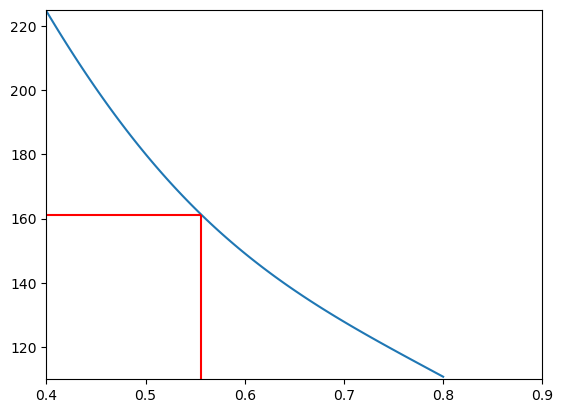

In [918]:
plt.plot(CV_V,pred[:,1].detach().numpy())
plt.hlines(161, 0.4, 0.556,'r')
plt.vlines(0.556, 110, 161,'r')
plt.ylim([110,225])
plt.xlim([0.4,0.9])

In [919]:
emulator.likelihoods[1]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [920]:
emulator.models[1]

ExactLRGPModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): LinearMean()
  (covar_module): ScaleKernel(
    (base_kernel): RBFKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [921]:
emulator.likelihoods[1].marginal(emulator.models[1](torch.tensor(newdf.iloc[:,0:1].values).float()))

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 6 but got size 1 for tensor number 1 in the list.

In [923]:
emulator.models[1](torch.tensor(newdf.iloc[:,0:6].values).float())

MultivariateNormal(loc: torch.Size([100]))

In [924]:
mll = gpytorch.mlls.ExactMarginalLogLikelihood(emulator.likelihoods[1], emulator.models[1])

In [925]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 100, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

    (A_TAT,)  (V_TAT,)
0    232.374   161.202
1    232.374   161.202
2    232.374   161.202
3    232.374   161.202
4    232.374   161.202
..       ...       ...
95   232.374   161.202
96   232.374   161.202
97   232.374   161.202
98   232.374   161.202
99   232.374   161.202

[100 rows x 2 columns]


In [926]:
mll(emulator.models[1]((torch.tensor(((newdf.iloc[:,0:6]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[:,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1]).values).float()).detach().numpy()

array(-42.707924, dtype=float32)

In [927]:
emulator.models[1](torch.tensor(newdf.iloc[:,0:6].values).float())

MultivariateNormal(loc: torch.Size([100]))

In [928]:
newdf.iloc[0:1,:].shape

(1, 6)

In [929]:
y_rep.iloc[1,1]

161.202

In [930]:
likelihood = np.zeros(100)
for i in range(100):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:6]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

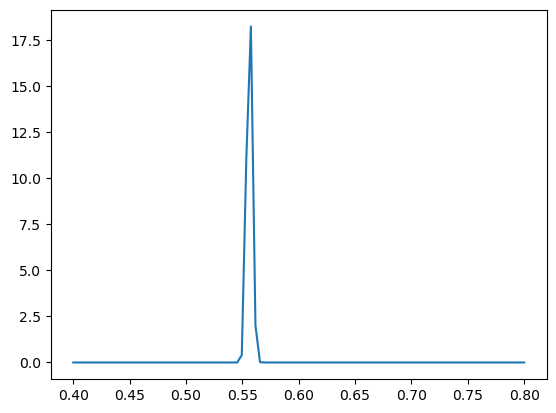

In [931]:
plt.plot(CV_V,likelihood)

In [932]:
prior = scipy.stats.norm.pdf(CV_V,0.6,1)

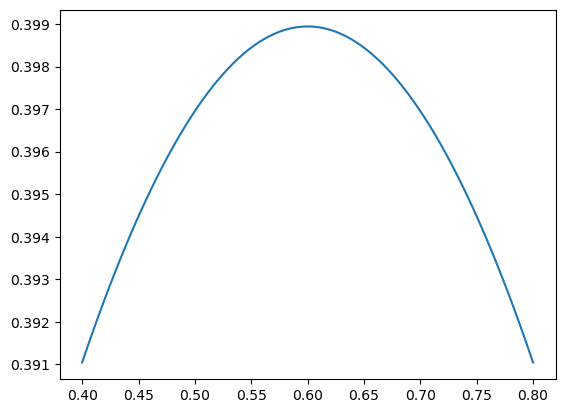

In [933]:
plt.plot(CV_V,prior)

In [934]:
posterior = likelihood*prior / (np.sum(likelihood*prior)*0.004)

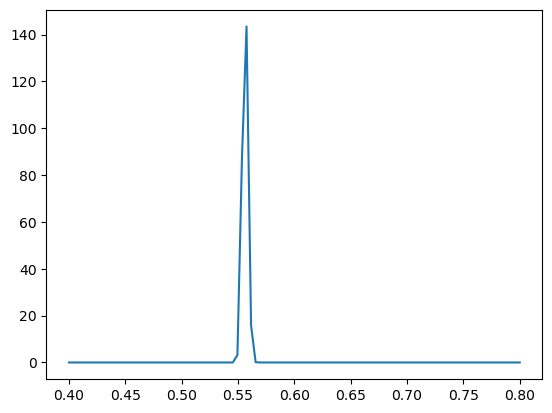

In [935]:
plt.plot(CV_V,posterior)

In [936]:
np.sum(posterior)*0.004

1.0

# True value is 0.556


In [959]:
emulator = GPE.ensemble(X_train.iloc[:,0:3],y_train,mean_func="linear",training_iter=500)

0
1


In [960]:
k_v = np.linspace(0.2,0.5,100)

In [961]:
k_v2, CV_V2 = np.meshgrid(k_v,CV_V)

In [962]:
k_v2.reshape(10000)

array([0.2       , 0.2030303 , 0.20606061, ..., 0.49393939, 0.4969697 ,
       0.5       ])

In [963]:
CV_V2.reshape(10000)

array([0.4, 0.4, 0.4, ..., 0.8, 0.8, 0.8])

In [964]:
newdf = pd.DataFrame(np.repeat(X_test.values, 10000, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

      (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0             0.556019         0.336764   2.42194     0.552269    0.215546   
1             0.556019         0.336764   2.42194     0.552269    0.215546   
2             0.556019         0.336764   2.42194     0.552269    0.215546   
3             0.556019         0.336764   2.42194     0.552269    0.215546   
4             0.556019         0.336764   2.42194     0.552269    0.215546   
...                ...              ...       ...          ...         ...   
9995          0.556019         0.336764   2.42194     0.552269    0.215546   
9996          0.556019         0.336764   2.42194     0.552269    0.215546   
9997          0.556019         0.336764   2.42194     0.552269    0.215546   
9998          0.556019         0.336764   2.42194     0.552269    0.215546   
9999          0.556019         0.336764   2.42194     0.552269    0.215546   

      (k_BB,)  
0     2.00919  
1     2.00919  
2     2.00919  

In [965]:
newdf.iloc[:,0] = CV_V2.reshape(10000)
newdf.iloc[:,1] = k_v2.reshape(10000)

In [966]:
pred = emulator.predict(newdf.iloc[:,0:3])

In [967]:
pred

tensor([[188.2672, 263.6223],
        [188.1066, 262.1801],
        [187.9464, 260.6815],
        ...,
        [204.5457, 103.1894],
        [204.4133, 103.0325],
        [204.2810, 102.9411]], grad_fn=<PermuteBackward0>)

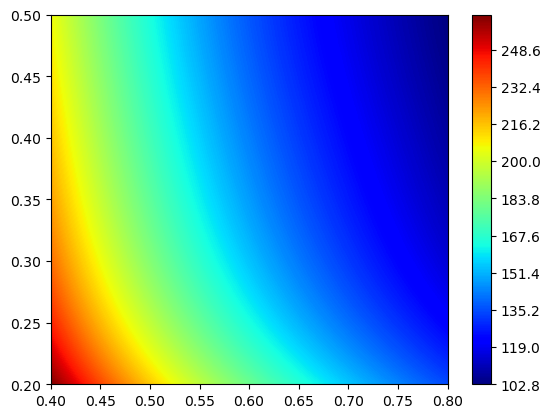

In [968]:
plt.contourf(CV_V2,k_v2, pred[:,1].detach().numpy().reshape(100,100),levels=1000, cmap = 'jet')
 
plt.colorbar()
plt.show()

In [969]:
X_test

(CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
26          0.556019         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
26  2.00919

In [970]:
y_test

(A_TAT,)  (V_TAT,)
26   232.374   161.202

In [971]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 10000, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

      (A_TAT,)  (V_TAT,)
0      232.374   161.202
1      232.374   161.202
2      232.374   161.202
3      232.374   161.202
4      232.374   161.202
...        ...       ...
9995   232.374   161.202
9996   232.374   161.202
9997   232.374   161.202
9998   232.374   161.202
9999   232.374   161.202

[10000 rows x 2 columns]


In [972]:
likelihood = np.zeros(10000)
for i in range(10000):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:3]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

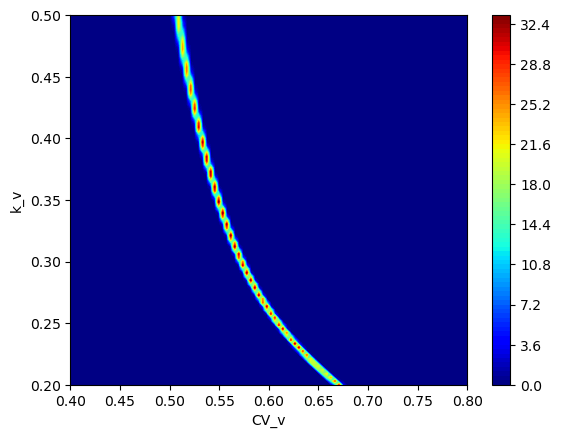

In [973]:
plt.contourf(CV_V2,k_v2, likelihood.reshape(100,100),levels=100, cmap = 'jet')
plt.colorbar()
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.show()


In [974]:
k_prior = scipy.stats.norm.pdf(k_v2,0.3,1)

In [975]:
posterior = likelihood.reshape(100,100)*k_prior / (np.sum(likelihood.reshape(100,100)*k_prior)*(0.004*0.003))

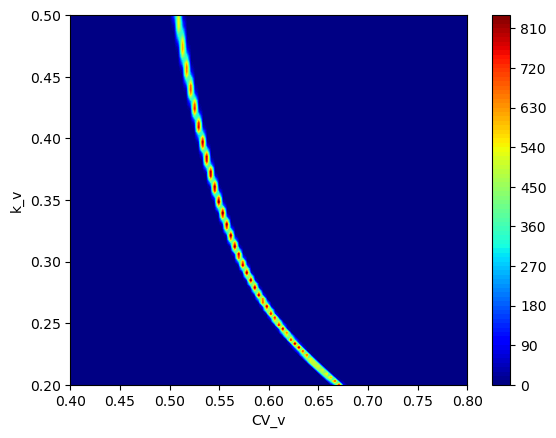

In [976]:
plt.contourf(CV_V2,k_v2, posterior,levels=100, cmap = 'jet')
plt.colorbar()
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.show()


In [956]:
c_prior = scipy.stats.norm.pdf(CV_V2,0.6,0.1)

In [957]:
posterior = likelihood.reshape(100,100)*c_prior / (np.sum(likelihood.reshape(100,100)*c_prior)*(0.004*0.003))

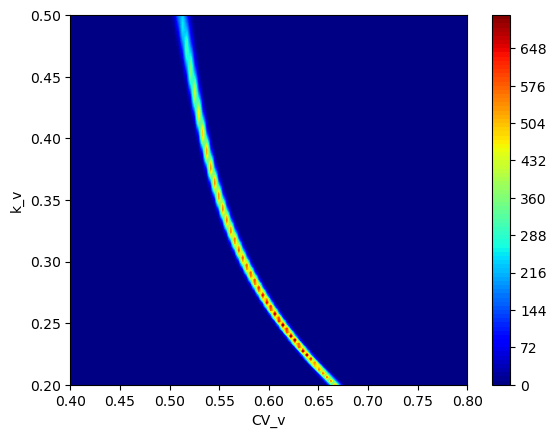

In [958]:
plt.contourf(CV_V2,k_v2, posterior,levels=100, cmap = 'jet')
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.colorbar()
plt.show()

# 3 params

In [706]:
inputOrig.max()

(CV_ventricles,)    0.798883
(k_ventricles,)     0.499215
(k_FEC,)            8.396810
(CV_atria,)         1.029280
(k_atria,)          0.499887
(k_BB,)             5.675750
dtype: float64

In [707]:
outputOrig.max()

(A_TAT,)    411.974
(V_TAT,)    251.164
dtype: float64

In [708]:
emulator = GPE.ensemble(X_train.iloc[:,0:3],y_train,mean_func="linear",training_iter=500)

0
1


In [709]:
100**2

10000

In [710]:
50**3

125000

In [711]:
CV_V = np.linspace(0.4,0.8,50)
k_v = np.linspace(0.2,0.5,50)
k_fec = np.linspace(1.2,8.4,50)


In [722]:
CV_V3,k_v3,k_fec3 = np.meshgrid(CV_V,k_v,k_fec)
X,Y,Z =  np.meshgrid(CV_V,k_v,k_fec)

In [723]:
newdf = pd.DataFrame(np.repeat(X_test.values, 125000, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

        (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0               0.556019         0.336764   2.42194     0.552269    0.215546   
1               0.556019         0.336764   2.42194     0.552269    0.215546   
2               0.556019         0.336764   2.42194     0.552269    0.215546   
3               0.556019         0.336764   2.42194     0.552269    0.215546   
4               0.556019         0.336764   2.42194     0.552269    0.215546   
...                  ...              ...       ...          ...         ...   
124995          0.556019         0.336764   2.42194     0.552269    0.215546   
124996          0.556019         0.336764   2.42194     0.552269    0.215546   
124997          0.556019         0.336764   2.42194     0.552269    0.215546   
124998          0.556019         0.336764   2.42194     0.552269    0.215546   
124999          0.556019         0.336764   2.42194     0.552269    0.215546   

        (k_BB,)  
0       2.00919  
1  

In [724]:
newdf.iloc[:,0] = X.reshape(125000)
newdf.iloc[:,1] = Y.reshape(125000)
newdf.iloc[:,2] = Z.reshape(125000)

In [725]:
newdf.iloc[:,0:3]

(CV_ventricles,)  (k_ventricles,)  (k_FEC,)
0                    0.4              0.2  1.200000
1                    0.4              0.2  1.346939
2                    0.4              0.2  1.493878
3                    0.4              0.2  1.640816
4                    0.4              0.2  1.787755
...                  ...              ...       ...
124995               0.8              0.5  7.812245
124996               0.8              0.5  7.959184
124997               0.8              0.5  8.106122
124998               0.8              0.5  8.253061
124999               0.8              0.5  8.400000

[125000 rows x 3 columns]

In [726]:
emulator.predict(newdf.iloc[:,0:3]).max(axis=0)

torch.return_types.max(
values=tensor([221.9327, 351.9814], grad_fn=<MaxBackward0>),
indices=tensor([2450,    0]))

In [727]:
data = emulator.predict(newdf.iloc[:,0:3]).detach().numpy()[:,1].reshape(50,50,50)

In [728]:
X2, Y2= np.meshgrid(CV_V,k_v)

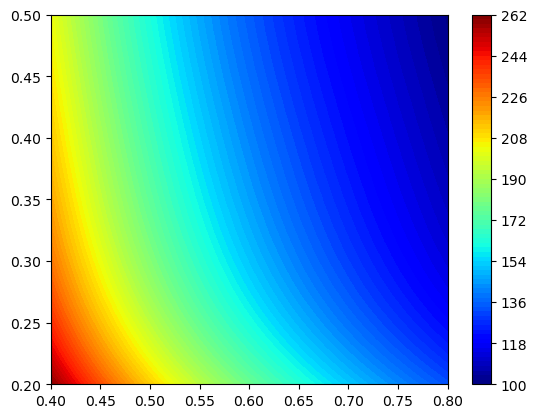

In [730]:
plt.contourf(X2,Y2, data[:,:,9],levels=100, cmap = 'jet')
plt.colorbar()
plt.show()

In [731]:
inputOrig.values[inputOrig.values[:,2]<1.3]

array([[0.546105, 0.302767, 1.2811  , 0.849472, 0.314406, 3.58887 ],
       [0.739425, 0.429136, 1.21197 , 0.370859, 0.24245 , 5.53377 ],
       [0.696926, 0.240736, 1.27473 , 0.867213, 0.465109, 3.83914 ]])

In [732]:
inputOrig.values[:,2]<1.3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [733]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 125000, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

        (A_TAT,)  (V_TAT,)
0        232.374   161.202
1        232.374   161.202
2        232.374   161.202
3        232.374   161.202
4        232.374   161.202
...          ...       ...
124995   232.374   161.202
124996   232.374   161.202
124997   232.374   161.202
124998   232.374   161.202
124999   232.374   161.202

[125000 rows x 2 columns]


In [734]:
likelihood = np.zeros(125000)
for i in range(125000):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:3]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

In [735]:
kfec_prior =scipy.stats.norm.pdf(k_fec3,4,2)
kv_prior = scipy.stats.norm.pdf(k_v3,0.4,2)
CV_prior = scipy.stats.norm.pdf(CV_V3,0.6,2)

In [736]:
CV_posterior = likelihood.reshape(50,50,50)*CV_prior / (np.sum(likelihood.reshape(50,50,50)*CV_prior)*(0.008*0.006*0.144))
kv_posterior = likelihood.reshape(50,50,50)*kv_prior / (np.sum(likelihood.reshape(50,50,50)*kv_prior)*(0.008*0.006*0.144))
kfec_posterior = likelihood.reshape(50,50,50)*kfec_prior / (np.sum(likelihood.reshape(50,50,50)*kfec_prior)*(0.008*0.006*0.144))

In [749]:
CV, kv = np.meshgrid(CV_V,k_v)

In [764]:
k_fec[8]

2.3755102040816327

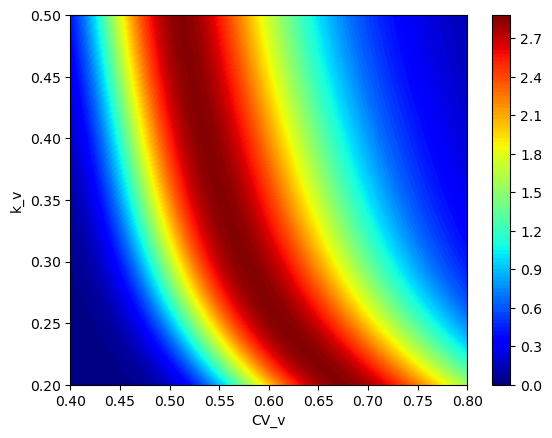

In [763]:
plt.contourf(CV,kv, CV_posterior[:,:,8],levels=100, cmap = 'jet')
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.colorbar()
plt.show()

In [765]:
k_fec

array([1.2       , 1.34693878, 1.49387755, 1.64081633, 1.7877551 ,
       1.93469388, 2.08163265, 2.22857143, 2.3755102 , 2.52244898,
       2.66938776, 2.81632653, 2.96326531, 3.11020408, 3.25714286,
       3.40408163, 3.55102041, 3.69795918, 3.84489796, 3.99183673,
       4.13877551, 4.28571429, 4.43265306, 4.57959184, 4.72653061,
       4.87346939, 5.02040816, 5.16734694, 5.31428571, 5.46122449,
       5.60816327, 5.75510204, 5.90204082, 6.04897959, 6.19591837,
       6.34285714, 6.48979592, 6.63673469, 6.78367347, 6.93061224,
       7.07755102, 7.2244898 , 7.37142857, 7.51836735, 7.66530612,
       7.8122449 , 7.95918367, 8.10612245, 8.25306122, 8.4       ])

In [766]:
X_test

(CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
26          0.556019         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
26  2.00919

In [767]:
np.argmax(CV_posterior)

48706

In [768]:
CV_posterior.shape

(50, 50, 50)

In [772]:
CV_V3.reshape(125000)[np.argmax(likelihood)]

0.47346938775510206

In [773]:
k_fec3.reshape(125000)[np.argmax(likelihood)]

4.1387755102040815

In [774]:
k_v3.reshape(125000)[np.argmax(likelihood)]

0.35918367346938773

# Multiple Patients

In [989]:
mode_weights = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\modes_weights.csv',index_col=0,delim_whitespace=False,header=0)

In [990]:
mode_weights=mode_weights.drop(15,axis=0)

In [991]:
meshes=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19']

In [992]:
x_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\xlabels_EP.txt',delim_whitespace=True,header=None)
x_labels=x_labels.values.flatten().tolist()+mode_weights.columns.tolist()

In [993]:
y_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\ylabels.txt',delim_whitespace=True,header=None)

In [994]:
val=meshes[len(meshes)-1]
inputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
outputData_left_out = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
modeweights = np.tile(mode_weights.iloc[len(meshes)-1,:].values, (inputData.shape[0],1))
input_modes_left_out = np.concatenate((inputData,modeweights),axis=1)

outputData_left_out =pd.DataFrame(outputData_left_out)
input_modes_left_out = pd.DataFrame(input_modes_left_out)
input_modes_left_out.columns=x_labels
outputData_left_out.columns=y_labels

In [995]:
all_input = []
all_output=[]
for i in range(len(meshes)-1):
    val=meshes[i]
    
    inputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
    outputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
    modeweights = np.tile(mode_weights.iloc[i,:].values, (inputData.shape[0],1))
    input_modes = np.concatenate((inputData,modeweights),axis=1)
    all_input.append(pd.DataFrame(input_modes))
    all_output.append(pd.DataFrame(outputData))
    print(val)
    print(np.max(outputData))
all_input=pd.concat(all_input)
all_output=pd.concat(all_output)
all_input.columns=x_labels
all_output.columns=y_labels

01
406.703
02
317.407
03
332.914
04
309.14
05
277.849
06
296.377
07
355.546
08
283.103
09
391.145
10
439.316
11
348.01
12
292.465
13
301.222
14
325.678
16
297.968
17
317.709
18
297.346


In [996]:
all_input=all_input.drop(labels=["CV_atria","k_atria", "k_BB"],axis=1)

In [997]:
all_input

CV_ventricles  k_ventricles    k_FEC      Mode1      Mode2      Mode3  \
0         0.487005      0.321104  6.56834 -26.526282 -21.987510  45.298672   
1         0.649337      0.345380  4.40605 -26.526282 -21.987510  45.298672   
2         0.666146      0.431970  7.48917 -26.526282 -21.987510  45.298672   
3         0.564330      0.319989  4.09474 -26.526282 -21.987510  45.298672   
4         0.519419      0.363704  6.37449 -26.526282 -21.987510  45.298672   
..             ...           ...      ...        ...        ...        ...   
175       0.450695      0.376123  4.74960 -23.204781 -27.182479 -35.870687   
176       0.532560      0.218931  3.25166 -23.204781 -27.182479 -35.870687   
177       0.529807      0.316814  3.79157 -23.204781 -27.182479 -35.870687   
178       0.536693      0.346377  4.10958 -23.204781 -27.182479 -35.870687   
179       0.665600      0.236143  1.48702 -23.204781 -27.182479 -35.870687   

        Mode4     Mode5      Mode6      Mode7  ...      Mode9    Mode10  \
0    6.964297  1.264487 -14.710058   2.926209  ...  23.694737  3.505879   
1    6.964297  1.264487 -14.710058   2.926209  ...  23.694737  3.505879   
2    6.964297  1.264487 -14.710058   2.926209  ...  23.694737  3.505879   
3    6.964297  1.264487 -14.710058   2.926209  ...  23.694737  3.505879   
4    6.964297  1.264487 -14.710058   2.926209  ...  23.694737  3.505879   
..        ...       ...        ...        ...  ...        ...       ...   
175  7.551222  3.960247   6.445815  12.219776  ...   6.663375  9.520599   
176  7.551222  3.960247   6.445815  12.219776  ...   6.663375  9.520599   
177  7.551222  3.960247   6.445815  12.219776  ...   6.663375  9.520599   
178  7.551222  3.960247   6.445815  12.219776  ...   6.663375  9.520599   
179  7.551222  3.960247   6.445815  12.219776  ...   6.663375  9.520599   

       Mode11    Mode12    Mode13    Mode14    Mode15    Mode16    Mode17  \
0    0.634389  5.188583  0.952835 -1.595273  1.443640 -0.904097 -1.312873   
1    0.634389  5.188583  0.952835 -1.595273  1.443640 -0.904097 -1.312873   
2    0.634389  5.188583  0.952835 -1.595273  1.443640 -0.904097 -1.312873   
3    0.634389  5.188583  0.952835 -1.595273  1.443640 -0.904097 -1.312873   
4    0.634389  5.188583  0.952835 -1.595273  1.443640 -0.904097 -1.312873   
..        ...       ...       ...       ...       ...       ...       ...   
175 -1.242942 -5.988096 -3.404571  3.616827 -4.258405 -4.047239  2.077171   
176 -1.242942 -5.988096 -3.404571  3.616827 -4.258405 -4.047239  2.077171   
177 -1.242942 -5.988096 -3.404571  3.616827 -4.258405 -4.047239  2.077171   
178 -1.242942 -5.988096 -3.404571  3.616827 -4.258405 -4.047239  2.077171   
179 -1.242942 -5.988096 -3.404571  3.616827 -4.258405 -4.047239  2.077171   

        Mode18  
0    -0.395244  
1    -0.395244  
2    -0.395244  
3    -0.395244  
4    -0.395244  
..         ...  
175  10.044157  
176  10.044157  
177  10.044157  
178  10.044157  
179  10.044157  

[3060 rows x 21 columns]

In [998]:
# split original dataset in training, validation and testing sets
X=all_input.iloc[:,0:12]
y=all_output

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)

In [999]:
emulator = GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=500)

0
1


In [1000]:
X_test_split = X_test.iloc[10].to_frame().T
y_test_split = y_test.iloc[10].to_frame().T

In [1001]:
X_test_left_out = input_modes_left_out.iloc[10,0:15].drop(labels=["CV_atria","k_atria", "k_BB"]).to_frame().T
y_test_left_out = outputData_left_out.iloc[10].to_frame().T

In [1002]:
X_test_split

CV_ventricles  k_ventricles   k_FEC      Mode1      Mode2      Mode3  \
0       0.416416       0.25125  4.5164 -23.204781 -27.182479 -35.870687   

      Mode4     Mode5     Mode6      Mode7     Mode8     Mode9  
0  7.551222  3.960247  6.445815  12.219776  1.824486  6.663375

In [1003]:
y_test_split

(A_TAT,)  (V_TAT,)
0   59.8958   135.091

In [1004]:
X_test_left_out

CV_ventricles  k_ventricles    k_FEC     Mode1     Mode2      Mode3  \
10       0.729355      0.307576  2.37725  4.180448 -2.934129 -30.660672   

       Mode4     Mode5      Mode6      Mode7     Mode8     Mode9  
10 -2.925176  5.912715 -10.612089 -16.116077 -7.741425  2.581669

In [1005]:
y_test_left_out

(A_TAT,)  (V_TAT,)
10    85.756   79.0727

In [1006]:
Nx = 20

In [793]:
CV_V = np.linspace(0.4,0.8,Nx)
k_v = np.linspace(0.2,0.5,Nx)
k_fec = np.linspace(1.2,8.4,Nx)

In [794]:
CV_V3,k_v3,k_fec3 = np.meshgrid(CV_V,k_v,k_fec)

In [795]:
newdf = pd.DataFrame(np.repeat(X_test_left_out.values, Nx**3, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test_left_out.columns
#print(newdf)

In [796]:
newdf.iloc[:,0] = CV_V3.reshape(Nx**3)
newdf.iloc[:,1] = k_v3.reshape(Nx**3)
newdf.iloc[:,2] = k_fec3.reshape(Nx**3)

In [797]:
data = emulator.predict(newdf).detach().numpy()[:,1].reshape(Nx,Nx,Nx)

In [798]:
y_rep = pd.DataFrame(np.repeat(y_test_left_out.values, Nx**3, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

      (A_TAT,)  (V_TAT,)
0       85.756   79.0727
1       85.756   79.0727
2       85.756   79.0727
3       85.756   79.0727
4       85.756   79.0727
...        ...       ...
7995    85.756   79.0727
7996    85.756   79.0727
7997    85.756   79.0727
7998    85.756   79.0727
7999    85.756   79.0727

[8000 rows x 2 columns]


In [799]:
likelihood = np.zeros(Nx**3)
for i in range(Nx**3):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [800]:
kfec_prior =scipy.stats.norm.pdf(k_fec3,4,2)
kv_prior = scipy.stats.norm.pdf(k_v3,0.4,2)
CV_prior = scipy.stats.norm.pdf(CV_V3,0.6,2)

In [801]:
dCV = (np.max(CV_V)-np.min(CV_V))/Nx
dkv = (np.max(k_v)-np.min(k_v))/Nx
dkfec = (np.max(k_fec)-np.min(k_fec))/Nx

In [802]:
CV_posterior = likelihood.reshape(Nx,Nx,Nx)*CV_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*CV_prior)*(dCV*dkv*dkfec))
kv_posterior = likelihood.reshape(Nx,Nx,Nx)*kv_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*kv_prior)*(dCV*dkv*dkfec))
kfec_posterior = likelihood.reshape(Nx,Nx,Nx)*kfec_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*kfec_prior)*(dCV*dkv*dkfec))

In [803]:
CV, kv = np.meshgrid(CV_V,k_v)

In [817]:
k_fec[9]

4.610526315789474

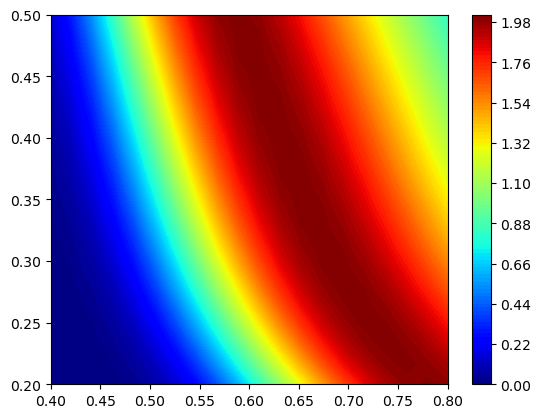

In [818]:
plt.contourf(CV,kv, CV_posterior[:,:,9],levels=100, cmap = 'jet')
plt.colorbar()
plt.show()

In [805]:
kv.shape

(20, 20)

In [806]:
CV_V3.reshape(Nx**3)[np.argmax(likelihood)]

0.6947368421052631

In [807]:
k_fec3.reshape(Nx**3)[np.argmax(likelihood)]

3.852631578947369

In [808]:
k_v3.reshape(Nx**3)[np.argmax(likelihood)]

0.2947368421052632

In [635]:
CV_V3.reshape(Nx**3)[np.argmax(CV_posterior)]

k_fec3.reshape(Nx**3)[np.argmax(CV_posterior)]

k_v3.reshape(Nx**3)[np.argmax(CV_posterior)]

0.3894736842105263

In [1031]:
x2 = X_test_left_out.copy()
x2.iloc[0,0:3] = p0[0]

In [1034]:
X_test_left_out.copy()

CV_ventricles  k_ventricles    k_FEC     Mode1     Mode2      Mode3  \
10       0.729355      0.307576  2.37725  4.180448 -2.934129 -30.660672   

       Mode4     Mode5      Mode6      Mode7     Mode8     Mode9  
10 -2.925176  5.912715 -10.612089 -16.116077 -7.741425  2.581669

In [1033]:
x2

CV_ventricles  k_ventricles    k_FEC     Mode1     Mode2      Mode3  \
10       2.232403     -0.401441  0.30179  4.180448 -2.934129 -30.660672   

       Mode4     Mode5      Mode6      Mode7     Mode8     Mode9  
10 -2.925176  5.912715 -10.612089 -16.116077 -7.741425  2.581669

In [1067]:
def log_prob(x,emulator,y_val):
    x2 = X_test_left_out.copy()
    x2.iloc[0,0:3] = x
    return mll(emulator.models[1]((torch.tensor(((x2-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_val-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy()

In [1068]:
p0[0]

array([1.49618485, 1.48401615, 0.40654869])

In [1069]:
emulator.training_input_mean

CV_ventricles    0.592083
k_ventricles     0.350345
k_FEC            4.796545
Mode1            0.337367
Mode2            1.156133
Mode3            2.686323
Mode4            0.454114
Mode5           -0.081962
Mode6            0.828327
Mode7            1.923770
Mode8            0.799889
Mode9           -0.232879
dtype: float64

In [1082]:
p0

array([[-0.42570656,  1.73626238, -0.28323132],
       [-0.61067303, -0.88989716,  1.08328339],
       [-0.60250022, -0.11623702, -0.5421704 ],
       [-0.15431368, -0.13538115, -0.97986067],
       [ 0.29292887,  0.90310702, -1.74855625],
       [ 0.29669743,  0.01575618,  1.16874216],
       [ 1.01085632, -0.43355674,  0.10747132],
       [-1.30911597, -0.99304371, -0.01023574],
       [-0.3194196 , -0.02459203, -0.78122558],
       [-3.74887241, -0.08073583, -1.1054779 ]])

In [1084]:
emulator.models[1].eval()
log_prob(p0[5],emulator,y_val)

array(-227.97498, dtype=float32)

In [1088]:
np.diag(3)

ValueError: Input must be 1- or 2-d.

In [1092]:
np.random.multivariate_normal((0.4,0.6,4), 0.1*np.identity(3), size=(nwalkers)).shape

(10, 3)

In [1093]:
p0.shape

(10, 3)

In [1094]:
import emcee
ndim = 3
nwalkers = 10
p0 = np.random.multivariate_normal((0.4,0.6,4), 0.1*np.identity(3), size=(nwalkers))
y_val = y_test_left_out.iloc[0,1]

In [1095]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[emulator,y_val])

In [1096]:
sampler

In [1097]:
state

State([[-180014.78354341  339394.27549861 -393063.14013078]
 [ 429076.75091299 -808301.12303535  912714.66235603]
 [ -62319.55896158  117664.9466226  -142249.81749293]
 [ -53992.23416181  102707.53482204 -151270.13745302]
 [ 108616.44659309 -204562.5078841   229256.0561924 ]
 [-444486.32988792  837836.08843537 -963908.98084616]
 [ 517478.43302336 -976280.88736179 1153769.10718859]
 [  33955.79300287  -64180.73223139   80156.34350946]
 [-107432.85586399  202579.57868563 -235601.89231502]
 [ 181142.90189091 -341860.94577393  408128.68315978]], log_prob=[-1.34854507 -1.34717155 -2.50668669 -1.62977159 -2.82513618 -5.0093441
 -2.42632771 -1.42284179 -2.24594021 -1.35335612], blobs=None, random_state=('MT19937', array([3286229427, 1517292991,  763841427, 1187841818, 2455555579,
       2469465743, 1548619828, 3338865161,  956476662, 3668604695,
       2287211978,  423544726, 2220714334, 3629402590,  288295879,
        773274856, 2599760982, 4002946381, 2005854623, 4284392688,
         117788

In [1098]:
state = sampler.run_mcmc(p0, 1000)
sampler.reset()

ValueError: Probability function returned NaN

In [ ]:
sampler.run_mcmc(state, 10000);

In [ ]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);